Datasets are available on the following link. https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases.

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


# Covid-19 Dataset

### 1. Compute the total confirmed cases per day in the country. Produce a table and a line plot.

In [6]:
confirmed_case_df = pd.read_csv("../covid-19/covid_confirmed_usafacts.csv")

In [7]:
# Skip 4 columns, that are non-number, Cases sum per day
cases = confirmed_case_df.sum(axis = 0, skipna = True)[4:]   
total_confirmed_cases_per_day = cases.to_frame(name="cases").reset_index()
total_confirmed_cases_per_day = total_confirmed_cases_per_day.rename(columns = {'index':'dates'}) 
total_confirmed_cases_per_day

,dates,cases
0,1/22/2020,1
1,1/23/2020,1
2,1/24/2020,2
3,1/25/2020,2
4,1/26/2020,5
...,...,...
71,4/2/2020,241643
72,4/3/2020,276889
73,4/4/2020,310597
74,4/5/2020,335338


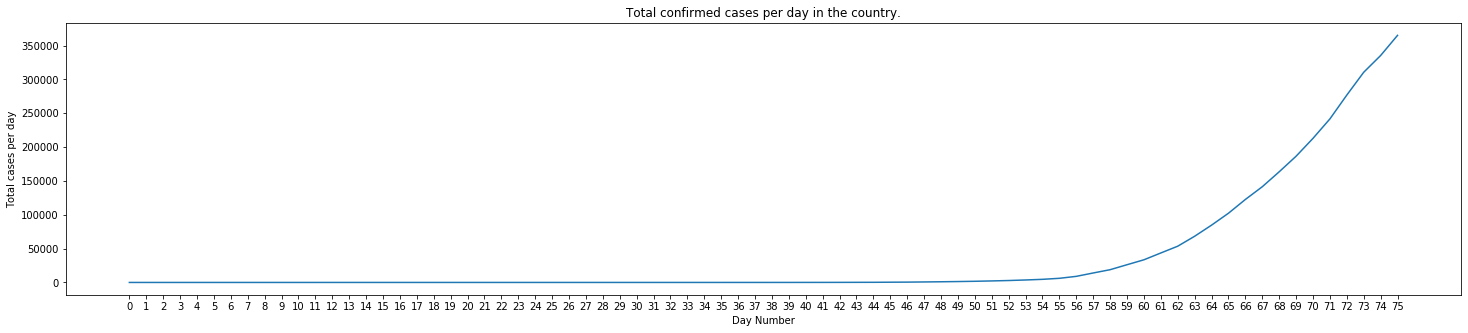

In [4]:
# Plotting total confirmed cases per day in the country
plt.figure(figsize = (25,5))
plt.plot (range(len(total_confirmed_cases_per_day.dates)), cases)
plt.xticks(range(len(total_confirmed_cases_per_day.dates)))
plt.xlabel("Day Number")
plt.ylabel("Total cases per day")
plt.title('Total confirmed cases per day in the country.')
plt.show()

###  2. Compute the total confirmed cases per week in the country. Produce a table of results. Plot the results using a log line plot. That is the log of the number of cases. A log plot of an exponential process will produce a straight line. Does the resulting plot look like an exponential?

In [46]:
# Converting dates to their week number
dates = total_confirmed_cases_per_day['dates'].tolist()
weeks = []
for value in dates:
    date_convert = datetime.datetime.strptime(value,'%m/%d/%Y')
    weekno = date_convert.strftime("%V")
    weeks.append(weekno)
weeks_df = pd.DataFrame({'Week' : weeks,'total_confirmed_cases_per_day': cases }) 

# Calculating total confirmed cases per week in country
cases_per_week = weeks_df.groupby('Week')['total_confirmed_cases_per_day'].max()
cases_per_week = cases_per_week.to_frame(name="cases_per_week").reset_index()
cases_per_week


,Week,cases_per_week
0,04,5
1,05,9
2,06,11
3,07,13
4,08,15
5,09,30
6,10,477
7,11,3643
8,12,33469
9,13,141409


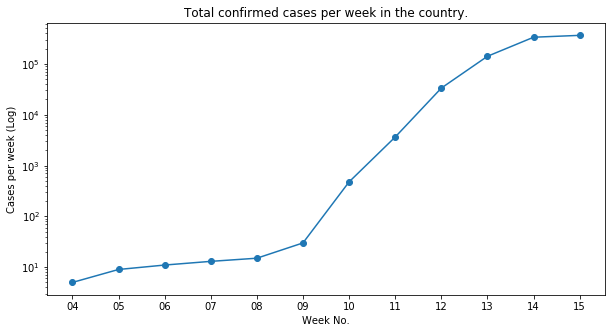

In [47]:
x = cases_per_week.Week
y = cases_per_week.cases_per_week

plt.figure(figsize = (10,5))
plt.plot(x,y,marker = 'o')
plt.yscale("log")
plt.xlabel("Week No.")
plt.ylabel("Cases per week (Log)")
plt.title('Total confirmed cases per week in the country.')
plt.show()

#### The resulting plot can be categorized as a combination of logarithmic and a power function plot. For the logarithmic part of the log, till week no 09 we observe immense variations in x correspond to small changes in y.
#### Following which a small change in x (week no) reflects a drastic change in y.

### 3. Compute the number of new confirmed cases per week in the the country. Produce a table of results.

In [48]:
week_no = cases_per_week["Week"].values

# Calculating difference between new cases
new_cases_per_week = cases_per_week.cases_per_week.diff().astype('Int64') 
new_cases_per_week.at[4] = cases_per_week.cases_per_week.at[4]
new_cases_per_week[new_cases_per_week < 0] = 0
new_cases_per_week = new_cases_per_week.reset_index()
new_cases_per_week.columns = ['Week','New_Cases'] 
new_cases_per_week["Week"] = week_no
new_cases_per_week.at[0,"New_Cases"]=cases_per_week['cases_per_week'].iloc[0]
new_cases_per_week

,Week,New_Cases
0,04,5
1,05,4
2,06,2
3,07,2
4,08,15
5,09,15
6,10,447
7,11,3166
8,12,29826
9,13,107940


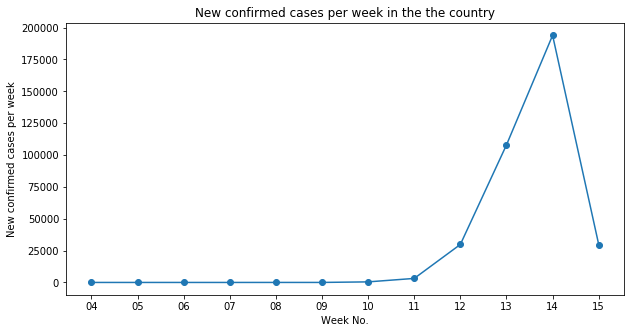

In [49]:
# Plotting known deaths per week in the country.
new_cases_per_week['New_Cases'] = new_cases_per_week['New_Cases'].astype(float)
a = new_cases_per_week.Week
b = new_cases_per_week.New_Cases

plt.figure(figsize = (10,5))
plt.plot(a,b,marker = 'o')
plt.xlabel("Week No.")
plt.ylabel("New confirmed cases per week")
plt.title('New confirmed cases per week in the the country')
plt.show()

### 4. Repeat #2 with the number of known deaths. 

In [50]:
death_df = pd.read_csv("covid-19/covid_deaths_usafacts.csv")

# Total known deaths per day
deaths = death_df.sum(axis = 0, skipna = True)[4:]   
known_deaths_per_day = deaths.to_frame(name = "deaths").reset_index()
known_deaths_per_day = known_deaths_per_day.rename(columns = {'index':'death_dates'})

# Converting dates to their week number
death_dates=known_deaths_per_day['death_dates'].tolist()
weeks=[]
for value in death_dates:
    date_convert = datetime.datetime.strptime(value,'%m/%d/%Y')
    death_weekno = date_convert.strftime("%V")
    weeks.append(death_weekno)   
week_count = pd.DataFrame({'Week_Number' : weeks, 'Death_per_day': deaths })

weeks_df = pd.DataFrame({'Week' : weeks,'known_deaths_per_day': deaths })

# Calculating total confirmed deaths per week in country
death_cases_week = weeks_df.groupby('Week')['known_deaths_per_day'].max().astype('Int64') 
death_cases_week = death_cases_week.to_frame(name = "Death_per_week").reset_index()
death_cases_week

,Week,Death_per_week
0,04,0
1,05,0
2,06,0
3,07,0
4,08,0
5,09,1
6,10,22
7,11,68
8,12,416
9,13,2458


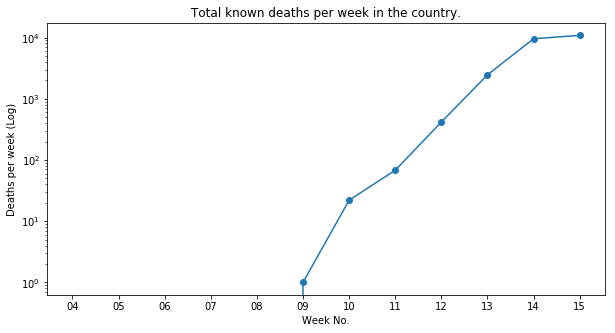

In [51]:
# Plotting new confirmed cases per week in the the country.
death_cases_week['Death_per_week'] = death_cases_week['Death_per_week'].astype(float)
x = death_cases_week.Week
y = death_cases_week.Death_per_week

plt.figure(figsize = (10,5))
plt.plot(x,y,marker = 'o')
plt.yscale("log")
plt.xlabel("Week No.")
plt.ylabel("Deaths per week (Log)")
plt.title('Total known deaths per week in the country.')
plt.show()

#### The resulting plot is resembles an exponential growth plot, as the rate of growth on the x axis (week no) is proportional to the instantaneous value of the quantity in y (deaths per week).

### 5.  Find the 10 counties with the most known number of covid-19 cases. Plot the number of cases each week. What are the differences or similarities? 

In [55]:
# Renaming dates by there week numbers
week_column = week_count.Week_Number
week_column = confirmed_case_df.rename(columns=week_column) 

# Dropping unwanted columns
week_column = week_column.drop(['countyFIPS', 'County Name','State','stateFIPS'], axis=1)

# Grouping week columns 
week_column = week_column.groupby(level=0,axis=1).max() 

# Counting weekwise confirmed cases
weekwise_confirmed = week_column.max(axis=1)
weekwise_confirmed = pd.DataFrame({"weekwise_confirmed_cases" : weekwise_confirmed})

# Concatenating confirmed cases with weeks
weekwise_confirmed_cases = pd.concat([week_column, weekwise_confirmed], axis=1)
weekwise_confirmed_cases = weekwise_confirmed_cases.reset_index() 

# Adding index to merge county and state using index
county_state_df = pd.DataFrame(confirmed_case_df,columns=confirmed_case_df.columns[0:3]).reset_index()
weekwise_confirmed_cases = weekwise_confirmed_cases.set_index('index')
county_state_df = county_state_df.set_index('index')
countywise_confirmed_cases = weekwise_confirmed_cases.merge(county_state_df, left_index=True, right_index=True) 

# Sorting by weekwise_confirmed_cases 
countywise_confirmed_ten_cases = countywise_confirmed_cases.sort_values(by='weekwise_confirmed_cases', ascending=False)[:10] 
countywise_confirmed_ten_cases = countywise_confirmed_ten_cases.drop(['countyFIPS','State'], axis = 1)
countywise_confirmed_ten_cases

,04,05,06,07,08,09,10,11,12,13,14,15,weekwise_confirmed_cases,County Name
index,,,,,,,,,,,,,,
1903,0,0,0,0,0,0,1,78,2715,10737,21436,23133,23133,Queens County
1886,0,0,0,0,0,0,3,53,2857,8887,18558,19702,19702,Kings County
1892,0,0,0,0,0,0,5,98,1900,6445,14398,15616,15616,Nassau County
1865,0,0,0,0,0,0,1,21,1411,6250,13368,14327,14327,Bronx County
1922,0,0,0,0,0,0,83,196,1873,8519,13723,14294,14294,Westchester County
1914,0,0,0,0,0,0,1,47,1034,5023,12405,13487,13487,Suffolk County
1893,0,0,0,0,0,0,8,72,2072,5582,9898,10440,10440,New York County
625,1,2,2,2,2,3,7,51,805,3445,8034,8728,8728,Cook County
1336,0,0,0,0,0,0,0,13,477,2704,7518,8270,8270,Wayne County


### Number of cases each week

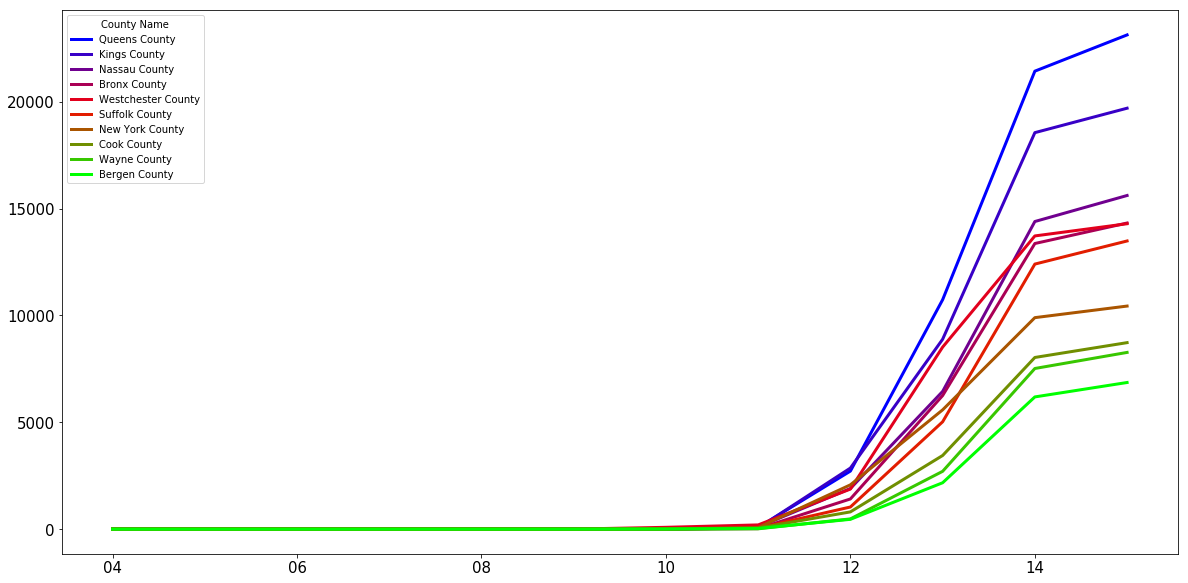

In [56]:
# plotting
countywise_confirmed_ten_cases = countywise_confirmed_ten_cases.drop(['weekwise_confirmed_cases'], axis = 1)
countywise_confirmed_ten_cases.set_index('County Name',inplace=True)
countywise_confirmed_ten_cases = countywise_confirmed_ten_cases.transpose()

all_counties = ['Queens County', 'Kings County', 'Nassau County', 'Bronx County', 'Westchester County', 'Suffolk County','New York County','Cook County','Wayne County','Bergen County']
countywise_confirmed_ten_cases[all_counties].plot(figsize=(20,10), linewidth=3, colormap='brg', fontsize=15);

#### As seen from the plot, the number of cases for all the counties are pretty much contained, and constant till approximately week 11.
#### In the subsequent weeks starting from week 12, we observe a substantial rise in the number of cases in all the counties. A peculiar thing to observe is that after week 14, the number of cases for almost all the counties start to level off.
#### Queens county is in the lead, while Bergen county has the lowest number of cases.

### 6: Compute the number of known cases per population in each county that have cases of covid-19. Produce a bar graph and table of the results for the 10 counties with the highest values and the 10 counties with the lowest values.

In [57]:
county_population = pd.read_csv("covid-19/covid_county_population_usafacts.csv")
countywise_confirmed_cases = pd.DataFrame({"countyFIPS" : confirmed_case_df["countyFIPS"].values,"State" : confirmed_case_df["State"].values,"confirmed_cases" : weekwise_confirmed["weekwise_confirmed_cases"].values, })

# Filtering cases with 0 value
countywise_confirmed_cases = countywise_confirmed_cases[countywise_confirmed_cases.iloc[:,-1] > 0]

# Merging population and countywise cases data
merge_cases_and_population = pd.merge(county_population, countywise_confirmed_cases, on = ['countyFIPS', 'State'])

# Filtering cases with 0 value
merge_cases_and_population = merge_cases_and_population[merge_cases_and_population.iloc[:,-2] > 0]

# Calculating known cases per population 
def cases_per_population(confirmed_cases, population):
    return confirmed_cases/population*100000    
merge_cases_and_population['Cases_Per_Population'] = cases_per_population(merge_cases_and_population['confirmed_cases'], merge_cases_and_population['population'])
merge_cases_and_population

,countyFIPS,County Name,State,population,confirmed_cases,Cases_Per_Population
0,1001,Autauga County,AL,55869,12,21.478817
1,1003,Baldwin County,AL,223234,38,17.022497
2,1005,Barbour County,AL,24686,3,12.152637
3,1007,Bibb County,AL,22394,7,31.258373
4,1009,Blount County,AL,57826,10,17.293259
...,...,...,...,...,...,...
2497,56035,Sublette County,WY,9831,1,10.171905
2498,56037,Sweetwater County,WY,42343,5,11.808327
2499,56039,Teton County,WY,23464,40,170.473917
2500,56041,Uinta County,WY,20226,3,14.832394


### Highest value : cases per population 

In [58]:
# Sorting top 10 high known cases per population 
highest_cases_per_population = merge_cases_and_population.sort_values(by = 'Cases_Per_Population', ascending = False)[:10]
highest_cases_per_population

,countyFIPS,County Name,State,population,confirmed_cases,Cases_Per_Population
513,16013,Blaine County,ID,23021,423,1837.452761
1503,36087,Rockland County,NY,325789,5703,1750.519508
1519,36119,Westchester County,NY,967506,14294,1477.406858
951,22071,Orleans Parish,LA,390144,4565,1170.080791
1489,36059,Nassau County,NY,1356924,15616,1150.838219
1500,36081,Queens County,NY,2253858,23133,1026.373445
1462,36005,Bronx County,NY,1418207,14327,1010.219242
1502,36085,Richmond County,NY,476143,4579,961.685880
1511,36103,Suffolk County,NY,1476601,13487,913.381475
1495,36071,Orange County,NY,384940,3397,882.475191


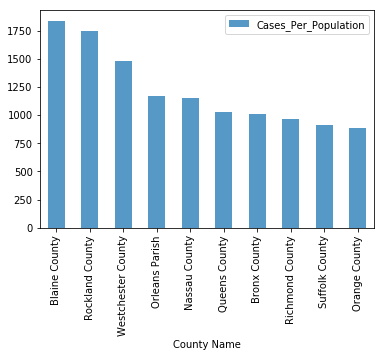

In [59]:
# Plotting 10 counties with the highest COVID-19 cases per population
ax = highest_cases_per_population.plot.bar(x = 'County Name', y = 'Cases_Per_Population', alpha=0.75)

### Lowest value : cases per population 

In [60]:
# Sorting top 10 low known cases per population 
lowest_cases_per_population = merge_cases_and_population.sort_values(by = 'Cases_Per_Population', ascending = True)[:10]
lowest_cases_per_population

,countyFIPS,County Name,State,population,confirmed_cases,Cases_Per_Population
2113,48213,Henderson County,TX,82737,1,1.208649
1705,39145,Scioto County,OH,75314,1,1.327774
981,23003,Aroostook County,ME,67055,1,1.491313
210,6103,Tehama County,CA,65084,1,1.536476
875,21125,Laurel County,KY,60813,1,1.644385
900,21195,Pike County,KY,57876,1,1.727832
2047,48001,Anderson County,TX,57735,1,1.732052
865,21093,Hardin County,KY,110958,2,1.802484
212,6109,Tuolumne County,CA,54478,1,1.835603
1748,40079,Le Flore County,OK,49853,1,2.005897


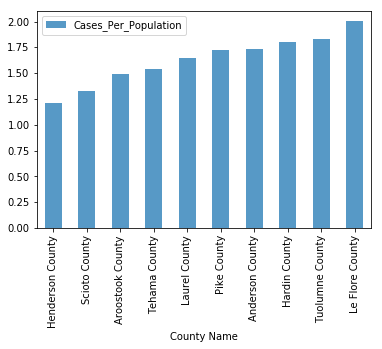

In [61]:
# Plotting 10 counties with the lowest COVID-19 cases per population
ax = lowest_cases_per_population.plot.bar(x = 'County Name', y = 'Cases_Per_Population', alpha=0.75)

### 7. Compute the death rate (deaths/ known cases) in each county that have both deaths and known cases. Compute the mean and standard deviation of the results. 

In [62]:
week_column = week_count.Week_Number

#Renaming dates by there week numbers
week_column = death_df.rename(columns = week_column) 
week_column = week_column.drop(['countyFIPS', 'County Name','State','stateFIPS'], axis = 1)

#grouping week columns by taking max 
week_column = week_column.groupby(level = 0,axis = 1).max()  
weekwise_confirmed_deaths = week_column.max(axis = 1)
weekwise_confirmed_deaths = pd.DataFrame({"confirmed_deaths" : weekwise_confirmed_deaths}).astype('Int64')

#Concatenated confirmed cases with weeks
confirmed_deaths = pd.concat([week_column, weekwise_confirmed_deaths], axis = 1) 
confirmed_deaths = confirmed_deaths.reset_index() 
county_state_df = pd.DataFrame(confirmed_case_df,columns = confirmed_case_df.columns[0:3]).reset_index()
confirmed_deaths = confirmed_deaths.set_index('index')
county_state_df = county_state_df.set_index('index')

#Concatenated county name and state using index
countywise_confirmed_deaths = confirmed_deaths.merge(county_state_df, left_index = True, right_index = True) 
countywise_confirmed_deaths

#Merging confirmed_deaths and confirmed_cases
merge_death_and_knowncases = pd.merge(countywise_confirmed_deaths, countywise_confirmed_cases, on = ['countyFIPS', 'State'])
merge_death_and_knowncases = merge_death_and_knowncases.drop(merge_death_and_knowncases.loc[:, '04':'15'].columns, axis = 1) 

#Filtering cases with 0
death_rate_each_county = merge_death_and_knowncases[(merge_death_and_knowncases["confirmed_cases"]!=0)] 

#Function to calculate deaths/known cases
def death_rate(confirmed_deaths, confirmed_cases):
    return confirmed_deaths/confirmed_cases
    
death_rate_each_county['death_rate'] = death_rate(death_rate_each_county['confirmed_deaths'], death_rate_each_county['confirmed_cases'])
death_rate_each_county

,confirmed_deaths,countyFIPS,County Name,State,confirmed_cases,death_rate
0,0,1001,Autauga County,AL,12,0.0
1,0,1003,Baldwin County,AL,38,0.0
2,0,1005,Barbour County,AL,3,0.0
3,0,1007,Bibb County,AL,7,0.0
4,0,1009,Blount County,AL,10,0.0
...,...,...,...,...,...,...
2497,0,56035,Sublette County,WY,1,0.0
2498,0,56037,Sweetwater County,WY,5,0.0
2499,0,56039,Teton County,WY,40,0.0
2500,0,56041,Uinta County,WY,3,0.0


In [63]:
print("Mean ", death_rate_each_county["death_rate"].mean())
print("Standard Deviation ", death_rate_each_county["death_rate"].std())

Mean  0.030367696155368332
Standard Deviation  0.18934349339322254


### 8. Produce a violin plot of the death rates found in #7

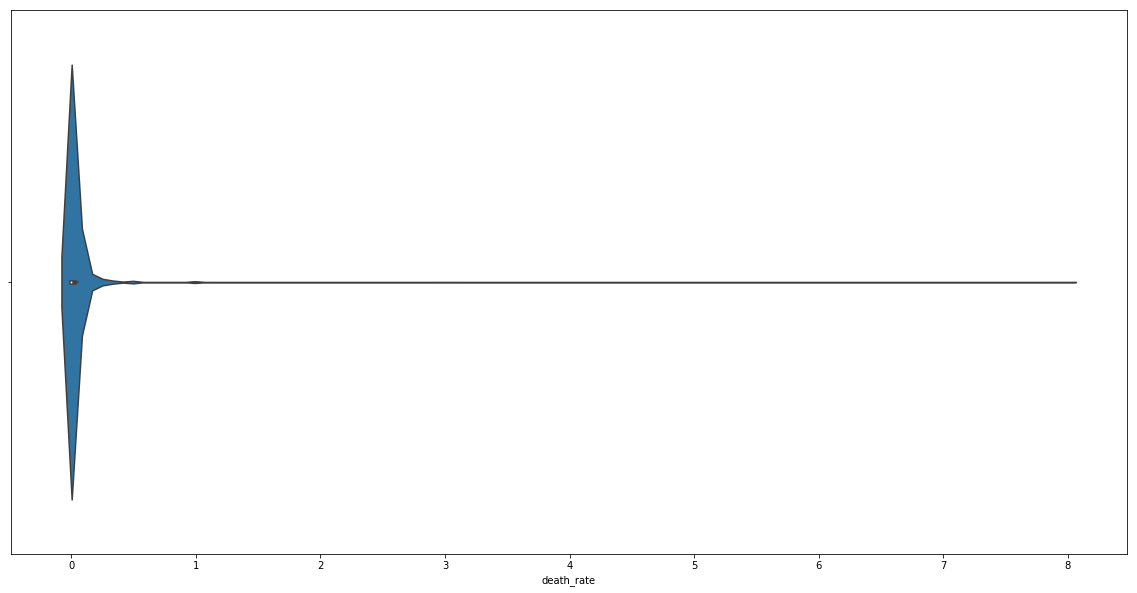

In [64]:
plt.figure(figsize = (20,10))
sns.violinplot(x = death_rate_each_county["death_rate"],showmeans = True, showextrema = True, showmedians = True)

### 9. There is some hope that covid-19 may have peaked in NYC (counties Bronx, Kings, New York, Queens and Richmond). Is there any evidence of that in the data?

In [65]:
new_york = pd.DataFrame(confirmed_case_df[(confirmed_case_df["County Name"] == "New York County") & (confirmed_case_df["State"] == "NY")])
Bronx = pd.DataFrame(confirmed_case_df[(confirmed_case_df["County Name"] == "Bronx County") & (confirmed_case_df["State"] == "NY")])
Kings = pd.DataFrame(confirmed_case_df[(confirmed_case_df["County Name"] == "Kings County") & (confirmed_case_df["State"] == "NY")])
Queens = pd.DataFrame(confirmed_case_df[(confirmed_case_df["County Name"] == "Queens County") & (confirmed_case_df["State"] == "NY")])
Richmond = pd.DataFrame(confirmed_case_df[(confirmed_case_df["County Name"] == "Richmond County") & (confirmed_case_df["State"] == "NY")])
nyc_counties = pd.concat([new_york,Bronx,Kings,Queens,Richmond])
nyc_counties

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
1893,36061,New York County,NY,36,0,0,0,0,0,0,...,5237,5582,6060,6539,7022,7398,8452,9300,9898,10440
1865,36005,Bronx County,NY,36,0,0,0,0,0,0,...,5752,6250,6925,7814,8607,9343,11086,12315,13368,14327
1886,36047,Kings County,NY,36,0,0,0,0,0,0,...,8129,8887,10171,11160,12274,13290,15700,17504,18558,19702
1903,36081,Queens County,NY,36,0,0,0,0,0,0,...,9831,10737,12756,13869,15217,16819,18823,20114,21436,23133
1905,36085,Richmond County,NY,36,0,0,0,0,0,0,...,1781,1984,2140,2354,2552,2822,3754,4073,4291,4579


In [66]:
# Renaming dates by there week numbers
week_columns = week_count.Week_Number
week_columns = nyc_counties.rename(columns = week_columns) 
week_columns

# Dropping non-integer columns for grouping
week_columns = week_columns.drop(['countyFIPS', 'County Name','State','stateFIPS'], axis = 1)

# Grouping week columns 
week_columns = week_columns.groupby(level = 0,axis = 1).max() 

# Counting weekwise confirmed cases
nyc_weekwise_confirmed = week_columns.max(axis = 1)
nyc_weekwise_confirmed = pd.DataFrame({"nyc_weekwise_confirmed_cases" : nyc_weekwise_confirmed})

# # Concatenating confirmed cases with weeks
nyc_weekwise_confirmed_cases = pd.concat([week_columns, nyc_weekwise_confirmed], axis = 1)
nyc_weekwise_confirmed_cases = nyc_weekwise_confirmed_cases.reset_index() 

# # Adding index to merge county and state using index
county_state_df = pd.DataFrame(nyc_counties,columns = nyc_counties.columns[0:3]).reset_index()
nyc_weekwise_confirmed_cases = nyc_weekwise_confirmed_cases.set_index('index')
county_state_df = county_state_df.set_index('index')
nyc_countywise_confirmed_cases = nyc_weekwise_confirmed_cases.merge(county_state_df, left_index = True, right_index = True) 

# Sorting by weekwise_confirmed_cases 
nyc_countywise_confirmed_cases = nyc_countywise_confirmed_cases.drop(['countyFIPS','State'], axis = 1)
nyc_countywise_confirmed_cases

,04,05,06,07,08,09,10,11,12,13,14,15,nyc_weekwise_confirmed_cases,County Name
index,,,,,,,,,,,,,,
1893,0,0,0,0,0,0,8,72,2072,5582,9898,10440,10440,New York County
1865,0,0,0,0,0,0,1,21,1411,6250,13368,14327,14327,Bronx County
1886,0,0,0,0,0,0,3,53,2857,8887,18558,19702,19702,Kings County
1903,0,0,0,0,0,0,1,78,2715,10737,21436,23133,23133,Queens County
1905,0,0,0,0,0,0,0,16,593,1984,4291,4579,4579,Richmond County


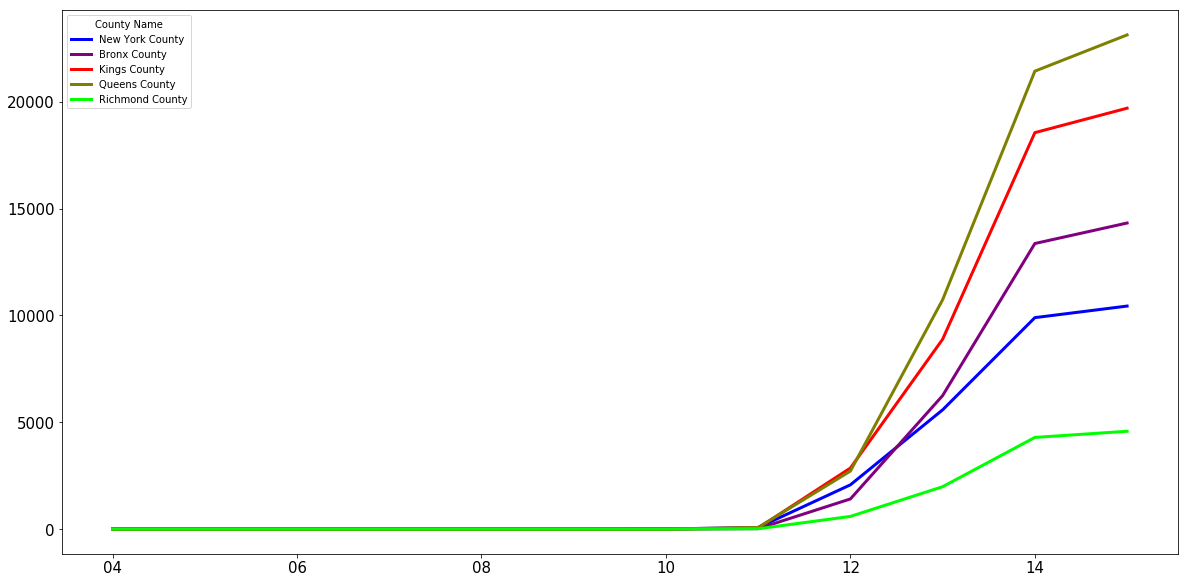

In [67]:
# plotting
nyc_countywise_confirmed_cases = nyc_countywise_confirmed_cases.drop(['nyc_weekwise_confirmed_cases'], axis = 1)
nyc_countywise_confirmed_cases.set_index('County Name',inplace = True)
nyc_countywise_confirmed_cases = nyc_countywise_confirmed_cases.transpose()

nyc_counties_plot = ['New York County', 'Bronx County', 'Kings County', 'Queens County', 'Richmond County']
nyc_countywise_confirmed_cases[nyc_counties_plot].plot(figsize = (20,10), linewidth=3, colormap='brg', fontsize=15);


####  Although following Week 14, the number of cases seem to not be rising as exponentially as previous weeks, the graph suggests that there could be another wave which may reflect new peaks. There is no evidence of tapering or decay of the graph to support peaking.
#### There may have peak. But this data suggests that cases in the beginning was zero, with the passage of time, it was increasing all the time. But not in the same ratio, so it indicates, that peak has gone. But we are not sure, there might another wave to cross the peak. 

### 10. Seattle (King county in Washington) also hopes that they have peaked. Is there any evidence of that in the data?

In [68]:
king_county = pd.DataFrame(confirmed_case_df[(confirmed_case_df["County Name"]=="King County") & (confirmed_case_df["State"]=="WA")])
king_county

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
3019,53033,King County,WA,53,1,1,1,1,1,1,...,2077,2161,2330,2330,2496,2656,2711,2865,3158,3295


In [69]:
# Renaming dates by there week numbers
week_columns = week_count.Week_Number
week_columns = king_county.rename(columns=week_columns) 

# Dropping non-integer columns for grouping
week_columns = week_columns.drop(['countyFIPS', 'County Name','State','stateFIPS'], axis=1)

# Grouping week columns 
week_columns = week_columns.groupby(level=0,axis=1).max() 

# Counting weekwise confirmed cases
kingcounty_weekwise_confirmed = week_columns.max(axis=1)
kingcounty_weekwise_confirmed = pd.DataFrame({"kingcounty_weekwise_confirmed_cases" : kingcounty_weekwise_confirmed})

# Concatenating confirmed cases with weeks
kingcounty_weekwise_confirmed_cases = pd.concat([week_columns, kingcounty_weekwise_confirmed], axis = 1)
kingcounty_weekwise_confirmed_cases = kingcounty_weekwise_confirmed_cases.reset_index() 

# # Adding index to merge county and state using index
county_state_df = pd.DataFrame(king_county,columns = king_county.columns[0:3]).reset_index()
kingcounty_weekwise_confirmed_cases = kingcounty_weekwise_confirmed_cases.set_index('index')
county_state_df = county_state_df.set_index('index')
kingcounty_countywise_confirmed_cases = kingcounty_weekwise_confirmed_cases.merge(county_state_df, left_index = True, right_index = True) 

# # Sorting by weekwise_confirmed_cases  
kingcounty_countywise_confirmed_cases = kingcounty_countywise_confirmed_cases.drop(['countyFIPS','State'], axis = 1)
kingcounty_countywise_confirmed_cases.set_index('County Name')

,04,05,06,07,08,09,10,11,12,13,14,15,kingcounty_weekwise_confirmed_cases
County Name,,,,,,,,,,,,,
King County,1,1,1,1,1,9,83,420,1040,2161,3158,3295,3295


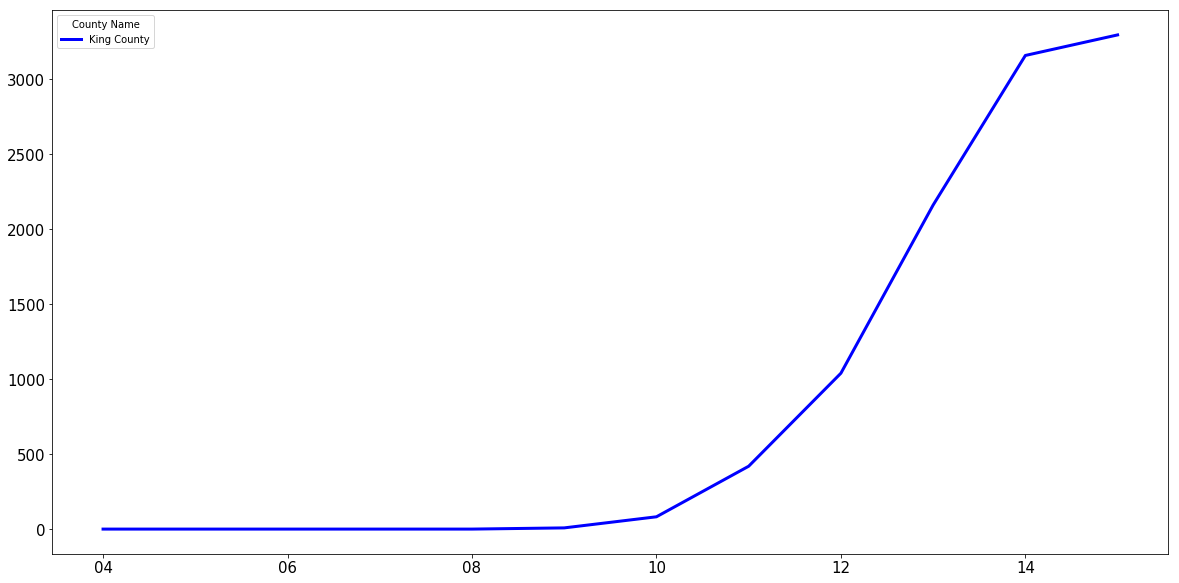

In [70]:
kingcounty_countywise_confirmed_cases = kingcounty_countywise_confirmed_cases.drop(['kingcounty_weekwise_confirmed_cases'], axis = 1)
kingcounty_countywise_confirmed_cases.set_index('County Name',inplace=True)
kingcounty_countywise_confirmed_cases = kingcounty_countywise_confirmed_cases.transpose()

kingcounty_plot = ['King County']
kingcounty_countywise_confirmed_cases[kingcounty_plot].plot(figsize = (20,10), linewidth=3, colormap='brg', fontsize=15);

#### King county in Washington shows relatively higher hope of peaking. Although, there is no decay of the graph to level with x axis or even lower, but the difference in the number of cases from previous cases seems less.
#### Data suggests, that peak has gone. In the last two days, if you see, there was not enoguth difference between cases. 